In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix , r2_score, mean_squared_error, accuracy_score

from sklearn.model_selection import GridSearchCV
from  sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.feature_selection import SelectKBest

from sklearn.cluster import KMeans

**Read CSV file**


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/MachineLearning_2023/COMP1801_CourseworkDataset1_tabular.csv')
data.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


**Exploratory data analysis**

In [ ]:
data.shape

(1000, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


<Axes: >

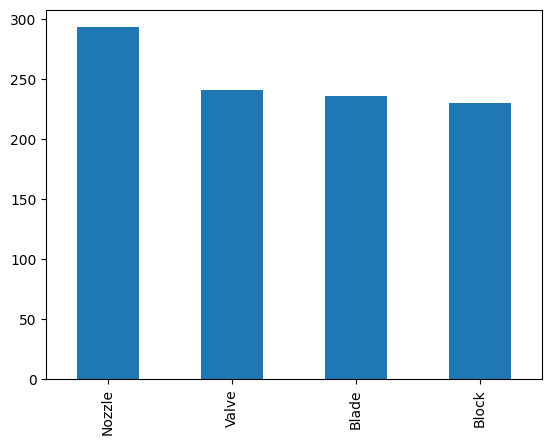

<Axes: >

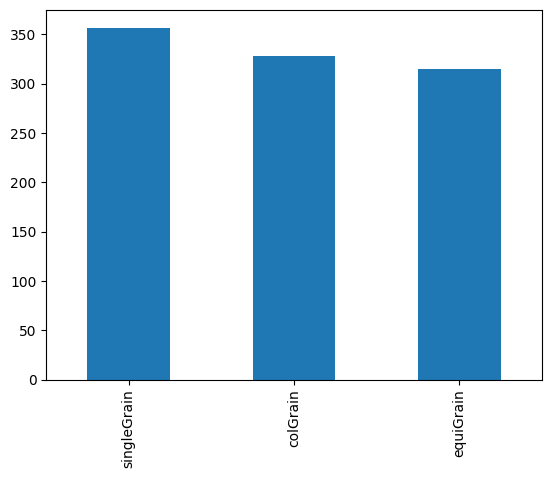

<Axes: >

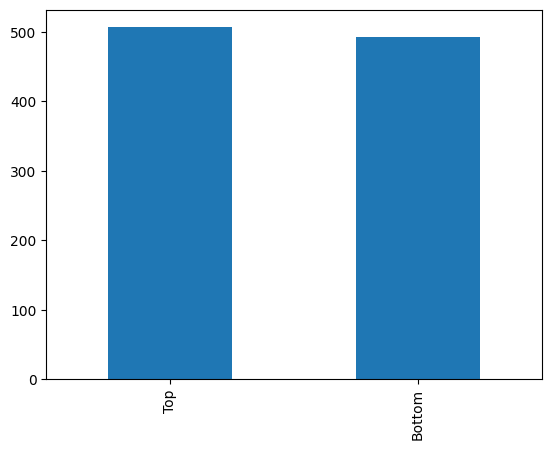

<Axes: >

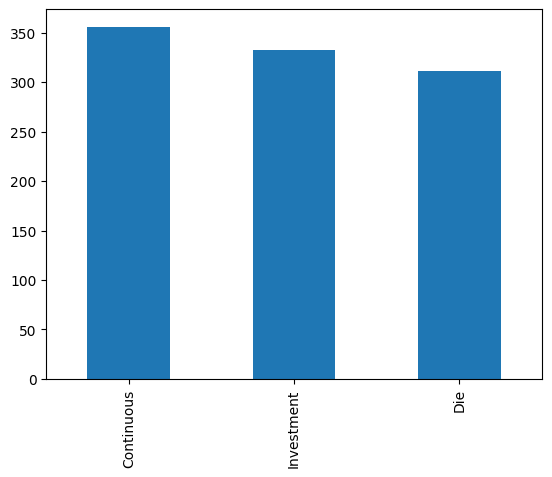

In [ ]:

display(data.partType.value_counts().plot(kind='bar'))
plt.show()
display(data.microstructure.value_counts().plot(kind='bar'))
plt.show()
display(data.seedLocation.value_counts().plot(kind='bar'))
plt.show()
display(data.castType.value_counts().plot(kind='bar'))
plt.show()

In [ ]:
print(data.partType.value_counts())
print('                            ')
print('*******************')
print(data.microstructure.value_counts())
print('                            ')
print('*******************')
print(data.seedLocation.value_counts())
print('                            ')
print('*******************')
print(data.castType.value_counts())


Nozzle    293
Valve     241
Blade     236
Block     230
Name: partType, dtype: int64
                            
*******************
singleGrain    357
colGrain       328
equiGrain      315
Name: microstructure, dtype: int64
                            
*******************
Top       507
Bottom    493
Name: seedLocation, dtype: int64
                            
*******************
Continuous    356
Investment    333
Die           311
Name: castType, dtype: int64


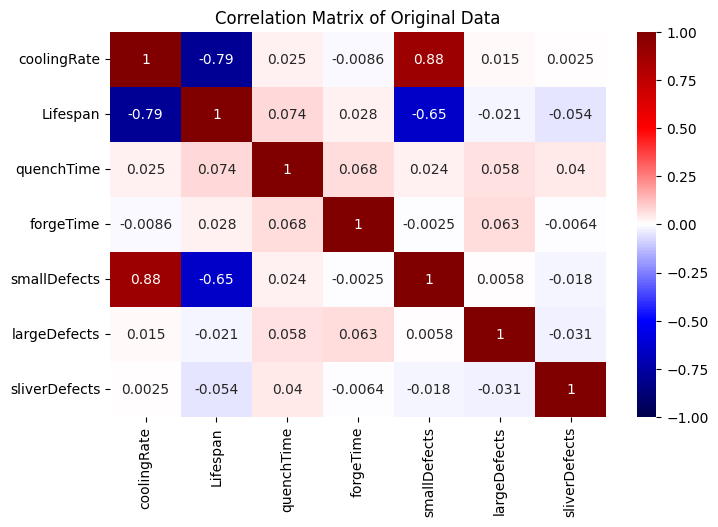

In [ ]:
corr_matrix = data[['coolingRate' ,'Lifespan', 'quenchTime' ,'forgeTime', 'smallDefects', 'largeDefects' ,'sliverDefects']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Original Data')
plt.show()

**The following characteristics has been taken into account based on the above correlation matrix:**

There is a significant positive correlation between coolingRate and smallDefect(0.88). This means that the increase in smallDefects will increase the coolingRate.

There is a significant inverse relationship between lifespan and smallDefect(-0.65). This implies that the lifespan of the metal increases with decrease in smallDefect.

We can also see a positive relation between coolingRate and largeDefects(0.015) which indicates that the number of largeDefects rises along with the coolingRate, but not as dramatically as the number of smallDefects.

There is a somewhat negative connection (-0.021) between lifespan and largeDefects.

In [ ]:
data.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1366.373468,17.480000,2.786059,5.497136,13.37100,0.117000,0.286000
std,519.026551,7.557958,1.320935,2.613501,8.07047,0.565359,1.351307
min,115.120563,5.000000,0.501046,1.017799,0.00000,0.000000,0.000000
25%,960.976320,11.000000,1.608916,3.203739,8.00000,0.000000,0.000000
50%,1470.377014,17.000000,2.824488,5.510765,16.00000,0.000000,0.000000
75%,1757.165684,24.000000,3.902389,7.735951,20.00000,0.000000,0.000000
max,2380.142759,30.000000,4.990795,9.988511,33.00000,4.000000,10.000000


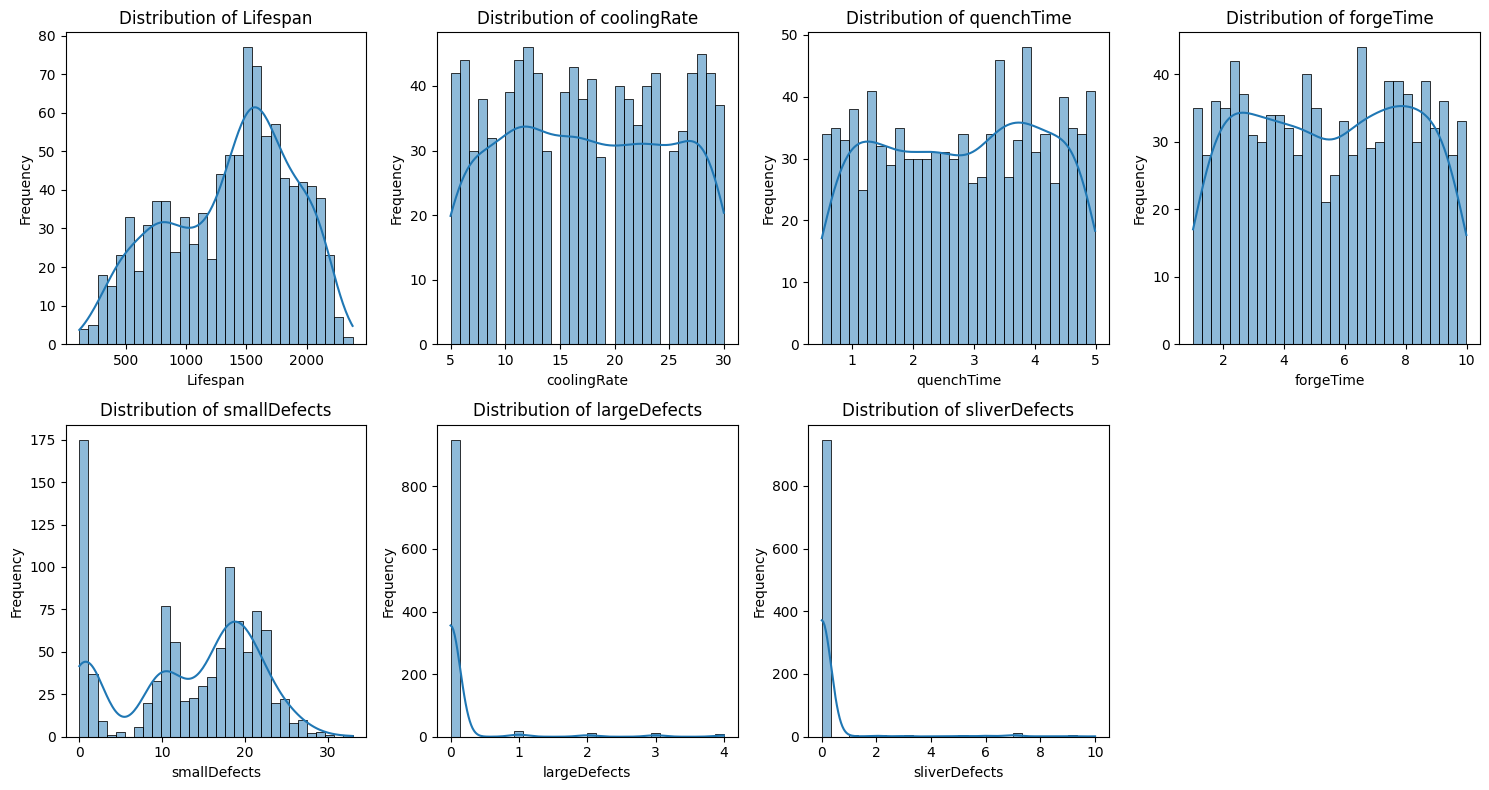

In [ ]:
features = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'smallDefects','largeDefects','sliverDefects']

# Plotting the distributions
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

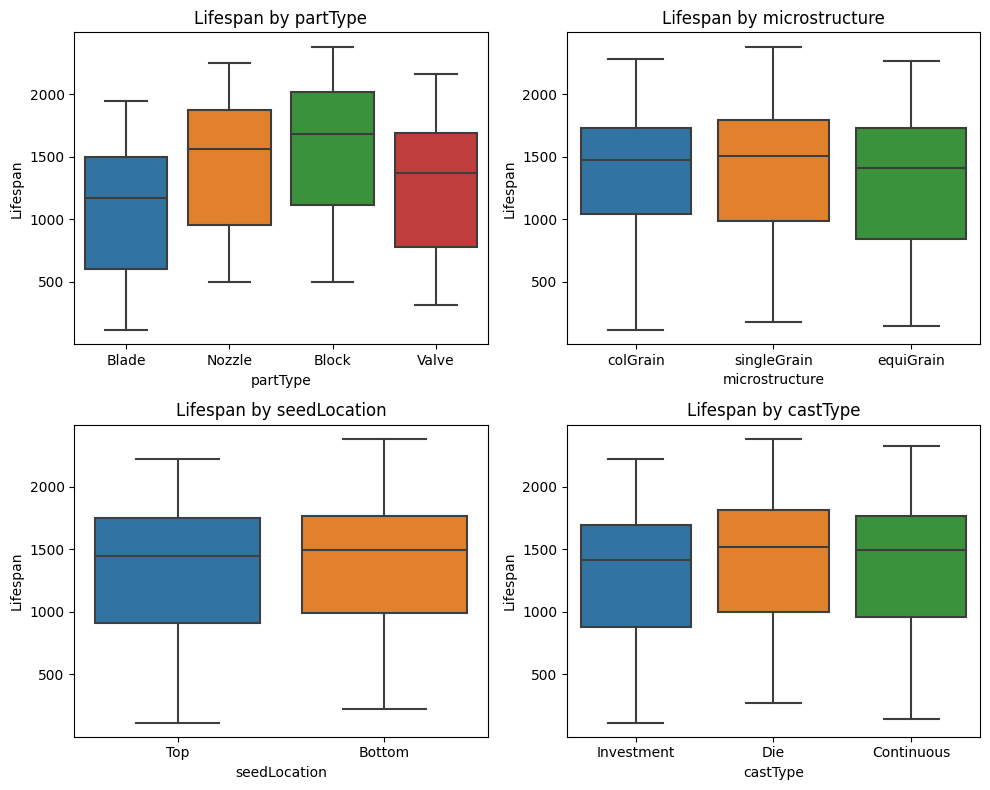

In [ ]:
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']

plt.figure(figsize=(10, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature], y=data['Lifespan'])
    plt.title(f'Lifespan by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Lifespan')

plt.tight_layout()
plt.show()

**Preprocessing**

**Label Encoding**

In [ ]:
le= LabelEncoder()
data['partType']= le.fit_transform(data['partType'])
data['microstructure']= le.fit_transform(data['microstructure'])
data['seedLocation']= le.fit_transform(data['seedLocation'])
data['castType']= le.fit_transform(data['castType'])

**Dataset after Label encoding**

In [ ]:
data.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,0,0,25,4.460592,7.937116,22,0,7,1,2
1,1599.551748,0,2,9,1.425973,2.432948,2,0,0,0,1
2,768.311031,2,0,26,2.508879,3.841211,25,0,0,0,2
3,1697.663828,0,0,12,3.248913,2.610700,10,0,0,0,0
4,1491.478862,2,0,20,1.901670,4.634926,24,0,0,1,1


**Creating X and Y dataframe from main dataframe where X is feature columns and Y is target column**

**Train Test Split**


In [ ]:
X= data.drop('Lifespan', axis=1)
y= data['Lifespan']

In [ ]:
X.head()

,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,0,0,25,4.460592,7.937116,22,0,7,1,2
1,0,2,9,1.425973,2.432948,2,0,0,0,1
2,2,0,26,2.508879,3.841211,25,0,0,0,2
3,0,0,12,3.248913,2.610700,10,0,0,0,0
4,2,0,20,1.901670,4.634926,24,0,0,1,1


In [ ]:
y.head()

0     284.161690
1    1599.551748
2     768.311031
3    1697.663828
4    1491.478862
Name: Lifespan, dtype: float64

**Standarizing data using StandardScaler**

In [ ]:
scaler= StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)

In [ ]:
X_train, X_test,y_train ,y_test= train_test_split(X_scaled, y, test_size= 0.2, shuffle=True, random_state=0)

## Regression

Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test= model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the train data:', mse_train)
print('MSE on the test data:', mse_test)

print('R2 score training set: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('R2 score test set: {:.4f}'.format(r2_score(y_test, y_pred_test)))

MSE on the train data: 90799.41036779615
MSE on the test data: 90690.10298595134
R2 score training set: 0.6542
R2 score test set: 0.6907


Choosing the best model using GridSearchCV

In [ ]:
model_params = {
    'svr': {
        'model': SVR(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [100,500]
        }
    }

}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
df

,model,best_score,best_params
0,svr,0.652649,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.978164,{'n_estimators': 500}


Support vector Regressor

In [ ]:
svr=SVR(C= 20, kernel = 'linear')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
r2_score(y_pred, y_test)

0.4125571427889423

Random Forest

In [ ]:
rf= RandomForestRegressor(n_estimators= 500)
rf.fit(X_train, y_train)

y_pred_train_rf =rf.predict(X_train)
y_pred_test_rf= rf.predict(X_test)


print('R2 score',r2_score(y_pred_train_rf, y_train))
print('R2 score',r2_score(y_pred_test_rf, y_test))

R2 score 0.9969405726587981
R2 score 0.9782542535451084


## Binary Classification

In [ ]:
data1= data.copy()


data1['Lifespan']=[1 if x>=1500 else 0 for x in data1['Lifespan']]

Here, the lifespan is categorized as 1 and 0 where 1 indicates having lifespan longer than 1500 hr and 0 indicates having lifespan less than 1500 hr.

In [ ]:
data1.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,0,0,0,25,4.460592,7.937116,22,0,7,1,2
1,1,0,2,9,1.425973,2.432948,2,0,0,0,1
2,0,2,0,26,2.508879,3.841211,25,0,0,0,2
3,1,0,0,12,3.248913,2.610700,10,0,0,0,0
4,0,2,0,20,1.901670,4.634926,24,0,0,1,1


Performing Train Test Split

In [ ]:
X= data1.drop('Lifespan', axis=1)
y= data1['Lifespan']

Spliting data into train and test set

In [ ]:
X_train, X_test,y_train ,y_test= train_test_split(X, y, test_size= 0.2, shuffle=True, random_state=0)

In [ ]:
model_params = {



   'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,10]
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,500]
        }
    }

}

In [ ]:
score = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False)
    clf.fit(X,y)
    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(score,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.814,{'C': 10}
1,random_forest,0.933,{'n_estimators': 500}


Logistic Regression

In [ ]:
lg= LogisticRegression(C= 10, max_iter=1000)
lg.fit(X_train, y_train)

y_pred= lg.predict(X_test)
accuracy_score(y_pred, y_test)



0.845

Support Vector Classifier

In [ ]:
sv= SVC(C= 2)
sv.fit(X_train, y_train)

y_pred= sv.predict(X_test)

accuracy_score(y_pred, y_test)

0.88

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators= 100)

rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)

Accuracy: 0.945
Mean squared error: 0.055


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[109,   5],
       [  6,  80]])

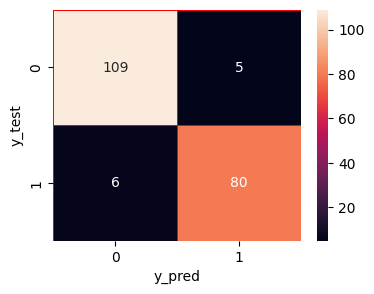

In [ ]:
f, ax=plt.subplots(figsize=(4,3))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

# Clustering

**K-Means Clustering**

In [ ]:
data2= data.copy()
data2.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,0,0,25,4.460592,7.937116,22,0,7,1,2
1,1599.551748,0,2,9,1.425973,2.432948,2,0,0,0,1
2,768.311031,2,0,26,2.508879,3.841211,25,0,0,0,2
3,1697.663828,0,0,12,3.248913,2.610700,10,0,0,0,0
4,1491.478862,2,0,20,1.901670,4.634926,24,0,0,1,1


In [ ]:
X= data2.drop('Lifespan', axis= 1)
y= data2['Lifespan']

In [ ]:
sse =[]

for k in range(1, 11):
  Kmeans = KMeans(n_clusters=k)
  Kmeans.fit(X)
  sse.append(Kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[135668.21738780985,
 45185.822528250064,
 31418.559694217576,
 22794.528138992144,
 20990.06714729682,
 19385.056360088893,
 18277.43705796603,
 17143.729195274747,
 16106.737261250993,
 15300.324595593984]

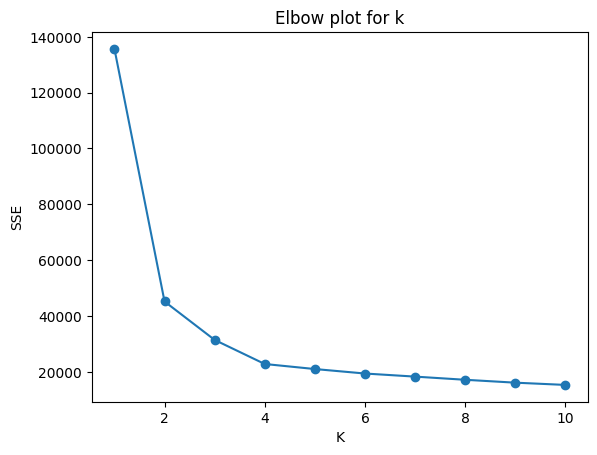

In [ ]:
plt.plot(range(1,11),sse, marker = 'o')
plt.title("Elbow plot for k")
plt.ylabel("SSE")
plt.xlabel("K")
plt.show()

Here, we can observe that the value of SSE dropping has slowed down from k=4.

In [ ]:
kmeans= KMeans(n_clusters= 4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

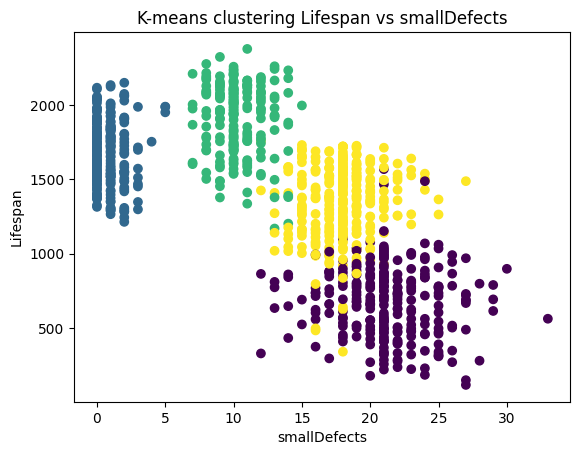

In [ ]:
plt.scatter(X['smallDefects'], y, c=kmeans.labels_)
plt.xlabel('smallDefects')
plt.ylabel('Lifespan')
plt.title('K-means clustering Lifespan vs smallDefects')
plt.show()